In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
%matplotlib inline

In [29]:
# Read data from file
df = pd.read_csv("epa-sea-level.csv")

df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


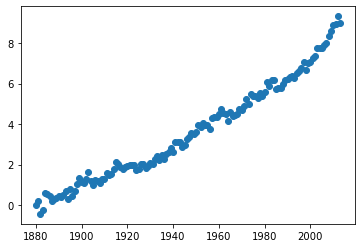

In [68]:
# Create scatter plot
plt.scatter(df["Year"], df["CSIRO Adjusted Sea Level"])

In [69]:
# Create first line of best fit
# Plot the line of best fit over the top of the scatter plot. 
# Make the line go through the year 2050 to predict the sea level rise in 2050.

slope, intercept, r_value, p_value, std_err = linregress(df["Year"], df["CSIRO Adjusted Sea Level"])
years_1 = pd.concat([df["Year"], pd.Series(np.arange(2014, 2051))])
predicted_values_1 = slope * years_1 + intercept

In [70]:
# Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. 
# Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

df_recent = df[df["Year"] >= 2000]
slope, intercept, r_value, p_value, std_err = linregress(df_recent["Year"], df_recent["CSIRO Adjusted Sea Level"])
years_2 = pd.concat([df_recent["Year"], pd.Series(np.arange(2014, 2051))])
predicted_values_2 = slope * years_2 + intercept

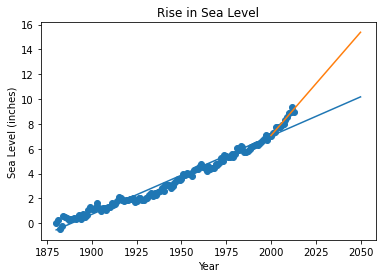

In [71]:
# Draw the scatter, first and second plot
plt.scatter(df["Year"], df["CSIRO Adjusted Sea Level"])
plt.plot(years_1, predicted_values_1)
plt.plot(years_2, predicted_values_2)

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.title("Rise in Sea Level")

plt.show()

In [72]:
plt.savefig('sea_level_plot.png')

<Figure size 432x288 with 0 Axes>